# Data Quality Analysis
Use this notebook to analyse quality of datas `data/song_data` and `data/log_data`.

## 1. Obtaining Data
First of all we will obtain all data into DataFrame.

Song Dataset > is a subset of real data from the Million Song Dataset. Each file is in JSON format and contains metadata about a song and the artist of that song. The files are partitioned by the first three letters of each song's track ID. For example, here are filepaths to two files in this dataset.

Log Dataset > consists of log files in JSON format generated by this event simulator based on the songs in the dataset above. These simulate activity logs from a music streaming app based on specified configurations.

In [1]:
# import the necessary packages
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Function which read absolute path of all files
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.json'))
        for f in files :
            all_files.append(os.path.abspath(f))
    
    return all_files

### 1.1 Obtaining song_data files with pandas

In [3]:
# Get path of all song_data
song_files = get_files("data/song_data")

In [4]:
# Create array to store data of all files from data/song_data
df_song_data_temp = []

# Read all song_data and append to above temp array
for filename in song_files:
    df_song = pd.read_json(filename, lines=True)
    df_song_data_temp.append(df_song)

# Concatenate data all all files into the same dataframe
df_song_data = pd.concat(df_song_data_temp)

df_song_data.head()

,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,num_songs,song_id,title,year
0,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,1,SOMZWCG12A8C13C480,I Didn't Mean To,0
0,ARNTLGG11E2835DDB9,NaN,,NaN,Clp,266.39628,1,SOUDSGM12AC9618304,Insatiable (Instrumental Version),0
0,AR8ZCNI1187B9A069B,NaN,,NaN,Planet P Project,269.81832,1,SOIAZJW12AB01853F1,Pink World,1984
0,AR10USD1187B99F3F1,NaN,"Burlington, Ontario, Canada",NaN,Tweeterfriendly Music,189.57016,1,SOHKNRJ12A6701D1F8,Drop of Rain,0
0,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,1,SOCIWDW12A8C13D406,Soul Deep,1969


### 1.2 Obtaining log_data files with pandas

In [5]:
# Get path of all log_data
log_files = get_files("data/log_data")

In [8]:
# Create array to store data of all files from data/log_data
df_log_data_temp = []

# Read all log_data and append to above temp array
for filename in log_files:
    df_log = pd.read_json(filename, lines=True)
    df_log_data_temp.append(df_log)

# Concatenate data all all files into the same dataframe
df_log_data = pd.concat(df_log_data_temp)

df_log_data.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Stephen Lynch,Logged In,Jayden,M,0,Bell,182.85669,free,"Dallas-Fort Worth-Arlington, TX",PUT,NextSong,1.540992e+12,829,Jim Henson's Dead,200,1543537327796,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,91
1,Manowar,Logged In,Jacob,M,0,Klein,247.56200,paid,"Tampa-St. Petersburg-Clearwater, FL",PUT,NextSong,1.540558e+12,1049,Shell Shock,200,1543540121796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",73
2,Morcheeba,Logged In,Jacob,M,1,Klein,257.41016,paid,"Tampa-St. Petersburg-Clearwater, FL",PUT,NextSong,1.540558e+12,1049,Women Lose Weight (Feat: Slick Rick),200,1543540368796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",73
3,Maroon 5,Logged In,Jacob,M,2,Klein,231.23546,paid,"Tampa-St. Petersburg-Clearwater, FL",PUT,NextSong,1.540558e+12,1049,Won't Go Home Without You,200,1543540625796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",73
4,Train,Logged In,Jacob,M,3,Klein,216.76363,paid,"Tampa-St. Petersburg-Clearwater, FL",PUT,NextSong,1.540558e+12,1049,Hey_ Soul Sister,200,1543540856796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",73


## 2. Data quality analysis
Now that We've already had all our data, we will ask some questions to analyze the quality of the datasets which we obtained.

### Q1. How many attributes (variables) and entries does our dataset have? What types of variables?
It's crucial to understand how many variables we have and their types. Thus, we can identify possible data transformations.

In [58]:
# identify the data volume of DataFrame df_song_data
print("+---------------song_data---------------+")

print("Number of Entries:\t {}".format(df_song_data.shape[0]))
print("Number of Variables: \t {}\n".format(df_song_data.shape[1]))

# check out the data type of each column/variable
display(df_song_data.dtypes)

+---------------song_data---------------+
Number of Entries:	 85
Number of Variables: 	 10



artist_id            object
artist_latitude     float64
artist_location      object
artist_longitude    float64
artist_name          object
duration            float64
num_songs             int64
song_id              object
title                object
year                  int64
dtype: object

In [57]:
# identify the data volume of DataFrame df_log_data
print("+---------------log_data---------------+")

print("Number of Entries:\t {}".format(df_log_data.shape[0]))
print("Number of Variables: \t {}\n".format(df_log_data.shape[1]))

# check out the data type of each column/variable
display(df_log_data.dtypes)

+---------------log_data---------------+
Number of Entries:	 8056
Number of Variables: 	 18



artist            object
auth              object
firstName         object
gender            object
itemInSession      int64
lastName          object
length           float64
level             object
location          object
method            object
page              object
registration     float64
sessionId          int64
song              object
status             int64
ts                 int64
userAgent         object
userId            object
dtype: object

### Q2. What is the percentage of missing values in the dataset?

When we are performing **Data Science**/**Data Analysis** work, the quality of a dataset is of utmost importance. And the quality of a dataset is directly related to the number of missing values. And it's important to understand early on in our analysis whether these null values ​​are significant compared to the total entries.


* Missing values from song_data DataFrame:
    * It's possible to see that we have more than **55%** of missing values in artist_latitude and artist_longitude. What say to us that some analysis with these columns could be harmed by had a big number of missing values;



* Missing values from df_log_data DataFrame:
    * It's possible to see that we have a little more than **15%** of missing values in artist, length, and song fields. Not is a higher number of missing values but is good to take care of.

In [34]:
# df_song_data -> sort the variables in descending order by their missing values
(df_song_data.isnull().sum() / df_song_data.shape[0])

artist_id           0.000000
artist_latitude     0.552941
artist_location     0.000000
artist_longitude    0.552941
artist_name         0.000000
duration            0.000000
num_songs           0.000000
song_id             0.000000
title               0.000000
year                0.000000
dtype: float64

In [35]:
# df_log_data -> sort the variables in descending order by their missing values
(df_log_data.isnull().sum() / df_log_data.shape[0])

artist           0.153426
auth             0.000000
firstName        0.035501
gender           0.035501
itemInSession    0.000000
lastName         0.035501
length           0.153426
level            0.000000
location         0.035501
method           0.000000
page             0.000000
registration     0.035501
sessionId        0.000000
song             0.153426
status           0.000000
ts               0.000000
userAgent        0.035501
userId           0.000000
dtype: float64

### Q3. What is the type of distribution of variables?

#### song_data

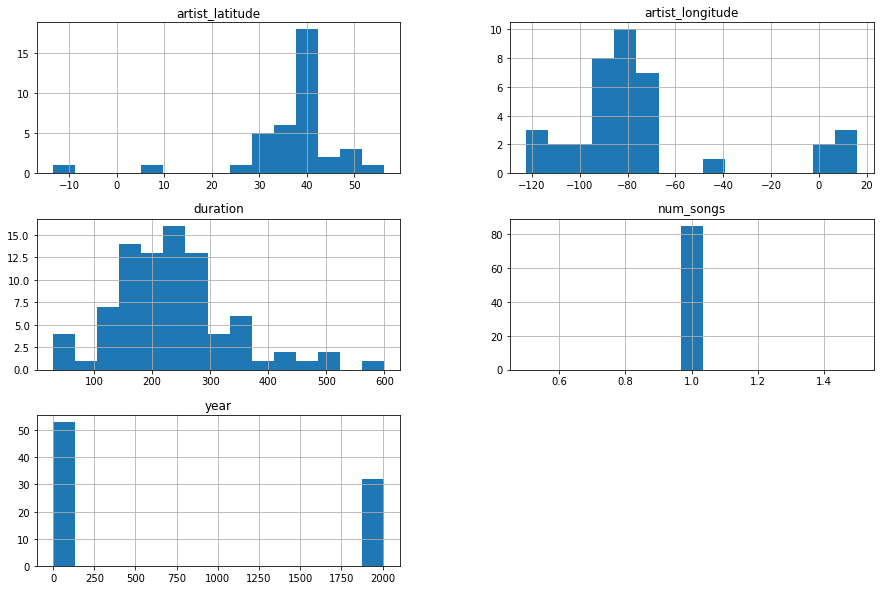

In [46]:
# plot histogram of numeric variables
df_song_data.hist(bins=15, figsize=(15,10));

In [47]:
# see the statistical summary of numeric variables - except year
df_song_data[['artist_latitude', 'artist_longitude', 'duration', 'num_songs']].describe()

,artist_latitude,artist_longitude,duration,num_songs
count,38.000000,38.000000,85.000000,85.0
mean,37.034856,-74.418966,234.761074,1.0
std,11.582990,36.224802,104.042452,0.0
min,-13.442000,-122.420050,29.544040,1.0
25%,35.149680,-93.034565,168.254240,1.0
50%,39.199420,-80.745085,228.597100,1.0
75%,40.952592,-74.007120,270.602000,1.0
max,56.276090,15.967600,599.248530,1.0


Analyzing the statistical summary above, we were able to confirm some hypotheses such as:

* All variables appear to have a good distribution in `song_data` DataFrame.

#### log_data

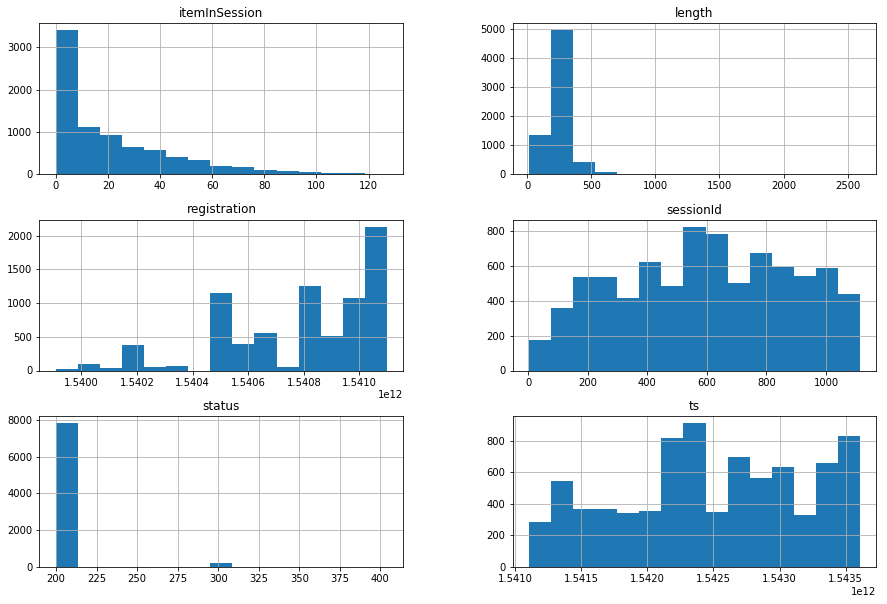

In [50]:
# plot histogram of numeric variables
df_log_data.hist(bins=15, figsize=(15,10));

In [52]:
# see the statistical summary of numeric variables - except year
df_log_data[['itemInSession', 'length', 'registration', 'sessionId', 'status', 'ts']].describe()

,itemInSession,length,registration,sessionId,status,ts
count,8056.000000,6820.000000,7.770000e+03,8056.000000,8056.000000,8.056000e+03
mean,21.198858,247.032221,1.540778e+12,598.167577,202.897592,1.542486e+12
std,23.440699,102.975921,2.651572e+08,285.313094,17.994256,7.003166e+08
min,0.000000,15.855870,1.539909e+12,3.000000,200.000000,1.541106e+12
25%,3.000000,197.321998,1.540558e+12,372.000000,200.000000,1.542023e+12
50%,13.000000,232.972605,1.540829e+12,605.000000,200.000000,1.542467e+12
75%,33.000000,274.121992,1.541020e+12,834.000000,200.000000,1.543064e+12
max,127.000000,2594.873020,1.541098e+12,1114.000000,404.000000,1.543608e+12
